In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# reading the excel file
df = pd.read_excel("NESTLE DATASET.xlsx")

In [3]:
#checking the dataset
data = {
    "Unnamed: 1": "Sales ID",
    "Unnamed: 2": "Date",
    "Unnamed: 3": "Product Name",
    "Unnamed: 4": "Total Revenue",
    "Unnamed: 5": "Sales Location",
    "Unnamed: 6": "Sales Medium",
    "Unnamed: 7": "Sales count",
    "Unnamed: 8": "Product Count"
}

# Rename the columns using the mapping defined in the 'data' dictionary
df.rename(columns=data, inplace=True)

# Drop the first row (which appears to be headers)
df = df.drop(0)

# Reset the DataFrame index
df = df.reset_index(drop=True)

df.head(15)

,Unnamed: 0,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,NaN,AT-18056,2020-06-07 00:00:00,Nescafe,279.3,Australian Capital Territory,Online,1,1
1,NaN,AT-9867,2019-05-14 00:00:00,Nescafe,263.46,Australian Capital Territory,Direct,1,1
2,NaN,AT-11225,2019-07-07 00:00:00,Nescafe,258.72,Australian Capital Territory,Online,1,1
3,NaN,AT-3208,2018-06-25 00:00:00,Nescafe,236.88,Australian Capital Territory,Online,1,1
4,NaN,AT-18812,2020-07-04 00:00:00,Nescafe,235.2,Australian Capital Territory,Online,1,1
5,NaN,AT-20812,2020-09-16 00:00:00,Nescafe,230.91,Australian Capital Territory,Online,1,1
6,NaN,AT-2937,2018-06-15 00:00:00,Nescafe,227.09,Australian Capital Territory,Direct,1,1
7,NaN,AT-306,2018-01-26 00:00:00,Nescafe,223.65,Australian Capital Territory,Direct,1,1
8,NaN,AT-3855,2018-07-18 00:00:00,Nescafe,223.65,Australian Capital Territory,Direct,1,1
9,NaN,AT-22548,2020-11-16 00:00:00,Nescafe,212.91,Australian Capital Territory,Direct,1,1


In [4]:
# check the number of rows and columns
df.shape

(18115, 9)

In [5]:
df["Unnamed: 0"].unique()  # wanted to confirm if there are other values apart from nan values

array([nan])

In [6]:
df = df.drop(["Unnamed: 0"] , axis = 1)
df.head(5)

,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,AT-18056,2020-06-07 00:00:00,Nescafe,279.3,Australian Capital Territory,Online,1,1
1,AT-9867,2019-05-14 00:00:00,Nescafe,263.46,Australian Capital Territory,Direct,1,1
2,AT-11225,2019-07-07 00:00:00,Nescafe,258.72,Australian Capital Territory,Online,1,1
3,AT-3208,2018-06-25 00:00:00,Nescafe,236.88,Australian Capital Territory,Online,1,1
4,AT-18812,2020-07-04 00:00:00,Nescafe,235.2,Australian Capital Territory,Online,1,1


In [7]:
df.info()  # we can also see for null_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sales ID        18115 non-null  object
 1   Date            18115 non-null  object
 2   Product Name    18115 non-null  object
 3   Total Revenue   18115 non-null  object
 4   Sales Location  18115 non-null  object
 5   Sales Medium    18115 non-null  object
 6   Sales count     18115 non-null  object
 7   Product Count   18115 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [8]:
df.describe().transpose()

,count,unique,top,freq
Sales ID,18115,18115,AT-18056,1
Date,18115,1006,2018-01-01 00:00:00,98
Product Name,18115,9,Nescafe,6368
Total Revenue,18115.0,2789.0,498.27,161.0
Sales Location,18115,8,Tasmania,3187
Sales Medium,18115,2,Direct,11152
Sales count,18115,1,1,18115
Product Count,18115,1,1,18115


In [9]:
# changing the type of date
df.Date = pd.to_datetime(df["Date"])

In [10]:
df.dtypes

Sales ID                  object
Date              datetime64[ns]
Product Name              object
Total Revenue             object
Sales Location            object
Sales Medium              object
Sales count               object
Product Count             object
dtype: object

In [11]:
df.head(5)  # checking to besure the code worked on the datetime

,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,AT-18056,2020-06-07,Nescafe,279.3,Australian Capital Territory,Online,1,1
1,AT-9867,2019-05-14,Nescafe,263.46,Australian Capital Territory,Direct,1,1
2,AT-11225,2019-07-07,Nescafe,258.72,Australian Capital Territory,Online,1,1
3,AT-3208,2018-06-25,Nescafe,236.88,Australian Capital Territory,Online,1,1
4,AT-18812,2020-07-04,Nescafe,235.2,Australian Capital Territory,Online,1,1


In [12]:
df["Product Name"].value_counts()

Nescafe             6368
Nestle Drumstick    2028
Kit Kat             1978
Milo                1619
Maggi               1555
Nes Cau             1457
Nescafe Gold        1299
Nesquik Duo         1014
Smarties             797
Name: Product Name, dtype: int64

In [13]:
df["Sales Medium"].value_counts()

Direct    11152
Online     6963
Name: Sales Medium, dtype: int64

## EDA

####  I could have trimmed the data to within the range 5000-8000 but i decided to use all the dataset

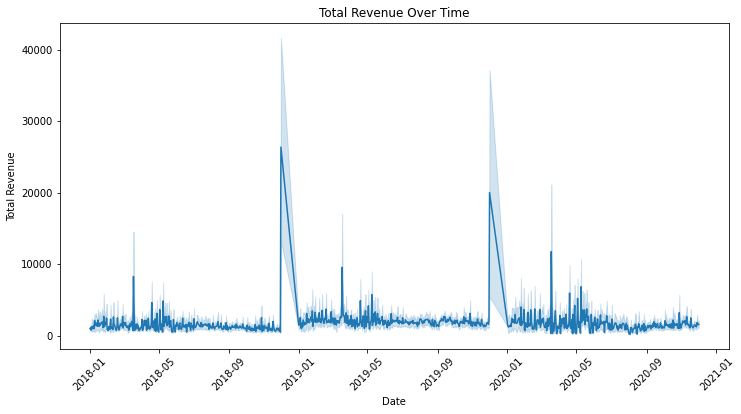

In [14]:
# Create a line chart for Total Revenue over time
plt.figure(figsize=(12, 6))
sb.lineplot(data=df, x='Date', y='Total Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

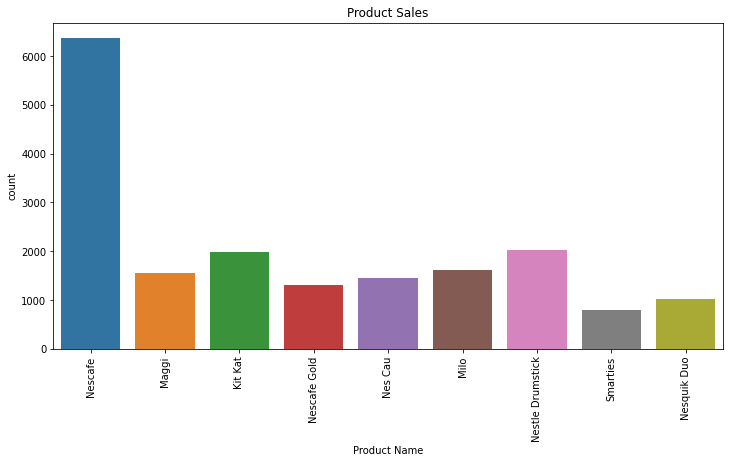

In [15]:
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x='Product Name')
plt.xticks(rotation=90)
plt.title('Product Sales')
plt.show()

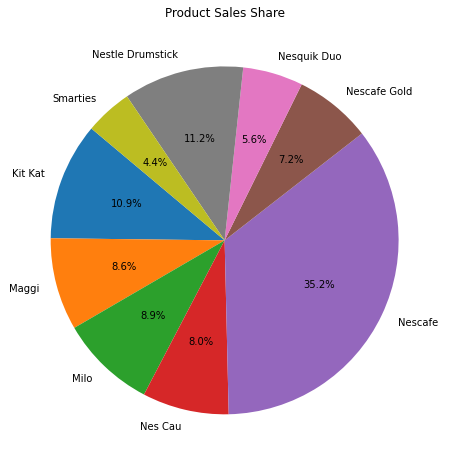

In [16]:

# Create a pie chart to visualize the share of product sales
product_sales = df.groupby('Product Name')['Sales count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Sales Share')
plt.show()

In [17]:
df["Sales Medium"] = df["Sales Medium"].replace({"Online" : 1 , "Direct" : 0})

In [18]:
df.head(150)

,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,AT-18056,2020-06-07,Nescafe,279.3,Australian Capital Territory,1,1,1
1,AT-9867,2019-05-14,Nescafe,263.46,Australian Capital Territory,0,1,1
2,AT-11225,2019-07-07,Nescafe,258.72,Australian Capital Territory,1,1,1
3,AT-3208,2018-06-25,Nescafe,236.88,Australian Capital Territory,1,1,1
4,AT-18812,2020-07-04,Nescafe,235.2,Australian Capital Territory,1,1,1
...,...,...,...,...,...,...,...,...
145,AT-7802,2019-01-12,Milo,3195.05,Australian Capital Territory,0,1,1
146,AT-8863,2019-03-22,Milo,6085.8,Australian Capital Territory,0,1,1
147,AT-13544,2019-10-01,Milo,6085.8,Australian Capital Territory,0,1,1
148,AT-14438,2019-11-02,Milo,3499.34,Australian Capital Territory,0,1,1


In [19]:
df["Sales Location"].unique()

array(['Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'], dtype=object)

Here i changed the state of the sales location and product name

-- You can use any method which i did below and we will see it gives the same result

### which are:
1) One Hot Encoder


2) Changing it manually


i will use the second method

In [20]:
df["Sales Location"] = df["Sales Location"].replace({"Australian Capital Territory" : 1 , 
                                               "New South Wales" : 2,
                                               "Northern Territory" : 3 , 
                                               "Queensland" : 4,
                                               "South Australia": 5   ,
                                               "Tasmania" : 6,
                                               "Victoria"  : 7,
                                               "Western Australia" : 8
                      })




df["Product Name"] = df["Product Name"].replace({"Nescafe" : 1,
                                                "Maggi" : 2,
                                                "Kit Kat" : 3,
                                                 "Nescafe Gold": 4,
                                                 "Nes Cau" : 5,
                                                 "Milo" : 6,
                                                 "Nestle Drumstick" : 7,
                                                 "Smarties" : 8,
                                                 "Nesquik Duo" : 9
                                                })

In [21]:
df["Product Name"].unique()


array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
df.head(5)

,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,AT-18056,2020-06-07,1,279.3,1,1,1,1
1,AT-9867,2019-05-14,1,263.46,1,0,1,1
2,AT-11225,2019-07-07,1,258.72,1,1,1,1
3,AT-3208,2018-06-25,1,236.88,1,1,1,1
4,AT-18812,2020-07-04,1,235.2,1,1,1,1


In [23]:
df.columns

Index(['Sales ID', 'Date', 'Product Name', 'Total Revenue', 'Sales Location',
       'Sales Medium', 'Sales count', 'Product Count'],
      dtype='object')

In [24]:
df.drop(["Sales ID" , "Date"] , axis = 1 , inplace = True)

In [25]:
df.head(5)

,Product Name,Total Revenue,Sales Location,Sales Medium,Sales count,Product Count
0,1,279.3,1,1,1,1
1,1,263.46,1,0,1,1
2,1,258.72,1,1,1,1
3,1,236.88,1,1,1,1
4,1,235.2,1,1,1,1


In [26]:
X = df.drop(["Sales Medium"], axis = 1).values
y = df["Sales Medium"].values

In [27]:
X

array([[1, 279.3, 1, 1, 1],
       [1, 263.46, 1, 1, 1],
       [1, 258.72, 1, 1, 1],
       ...,
       [1, 171.5, 8, 1, 1],
       [1, 130.46, 8, 1, 1],
       [1, 130.46, 8, 1, 1]], dtype=object)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
# Evaluate Logistic Regression
score_1 = cross_val_score(LogisticRegression(solver = "liblinear"), X, y)

# Evaluate Random Forest Classifier
score_2 = cross_val_score(RandomForestClassifier(n_estimators=45, max_depth=45), X, y)

# Evaluate Decision Tree Classifier
score_3 = cross_val_score(DecisionTreeClassifier(max_depth=45), X, y)

# Evaluate K-Nearest Neighbors Classifier
score_4 = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y)

# Print the cross-validation scores for each model
print("Logistic Regression Scores:", score_1)
print("Random Forest Scores:", score_2)
print("Decision Tree Scores:", score_3)
print("K-Nearest Neighbors Scores:", score_4 , "\n")


print("Mean Logistic Regression Score:", score_1.mean())
print("Mean Random Forest Score:", score_2.mean())
print("Mean Decision Tree Score:", score_3.mean())
print("Mean K-Nearest Neighbors Score:", score_4.mean())

Logistic Regression Scores: [0.65912227 0.64118134 0.63428098 0.60667955 0.6364891 ]
Random Forest Scores: [0.85040022 0.86475297 0.81231024 0.87524151 0.87910571]
Decision Tree Scores: [0.91388352 0.95059343 0.91940381 0.9287883  0.94755727]
K-Nearest Neighbors Scores: [0.82583494 0.85757659 0.85233232 0.83797957 0.83908363] 

Mean Logistic Regression Score: 0.635550648633729
Mean Random Forest Score: 0.8563621308308033
Mean Decision Tree Score: 0.9320452663538503
Mean K-Nearest Neighbors Score: 0.8425614131934861


In [30]:
## let's split the data into training and testing
## 80% training and 20% for testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu


In [32]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Direct','Online']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
## supervised machine learning models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LinearRegression


Aim is to see weather ensemble has higher accuracy than supervised machine learning or otherwise


note: ensemble model is the combination of 2 more supervised machine learning algorithms

## for the supervised machine learning alogrithms 
1. KNN
2. LOG
3. GNB

#### KNN (K-nearest neighbor)

In [34]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred_test_KNN=KNN_model.predict(X_test)
test_accuracy_KNN=accuracy_score(y_test,y_pred_test_KNN)
print('Accuracy in KNN',test_accuracy_KNN)




Accuracy in KNN 0.8763455699696384




Confusion Matrix:
[[2011  236]
 [ 212 1164]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2247
           1       0.83      0.85      0.84      1376

    accuracy                           0.88      3623
   macro avg       0.87      0.87      0.87      3623
weighted avg       0.88      0.88      0.88      3623



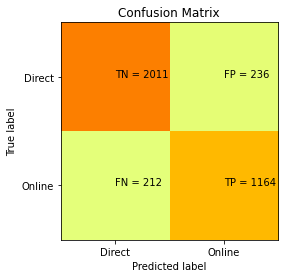

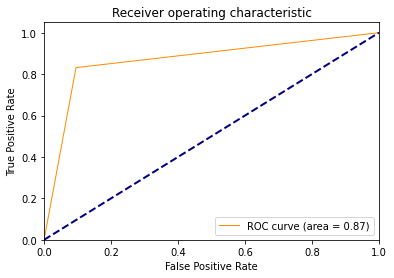

In [35]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
report_performance(KNN)
roc_curves(KNN)

#### LOG (Logistic Regression)

In [36]:
LOG_model=LogisticRegression()
LOG_model.fit(X_train,y_train)
y_pred=LOG_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of LOG',accuracy)



accuracy of LOG 0.6213083080320176




Confusion Matrix:
[[1552  695]
 [ 677  699]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      2247
           1       0.50      0.51      0.50      1376

    accuracy                           0.62      3623
   macro avg       0.60      0.60      0.60      3623
weighted avg       0.62      0.62      0.62      3623



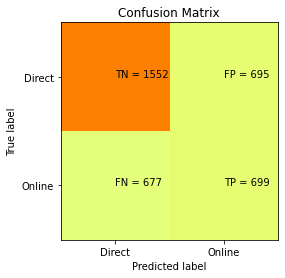

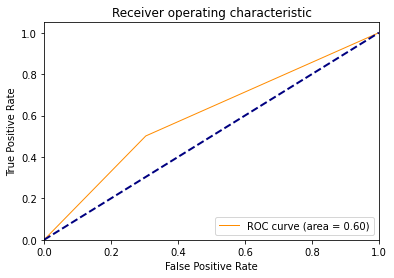

In [37]:
LOG=LogisticRegression()
LOG.fit(X_train,y_train)
report_performance(LOG)
roc_curves(LOG)

#### GNB (GaussianNB)

In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [39]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("accuracy", accuracy)



accuracy 0.71018492961634




Confusion Matrix:
[[1328  919]
 [ 131 1245]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      2247
           1       0.58      0.90      0.70      1376

    accuracy                           0.71      3623
   macro avg       0.74      0.75      0.71      3623
weighted avg       0.78      0.71      0.71      3623



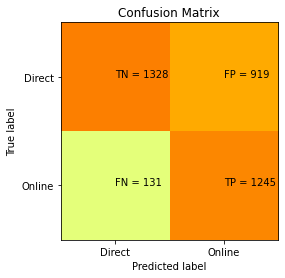

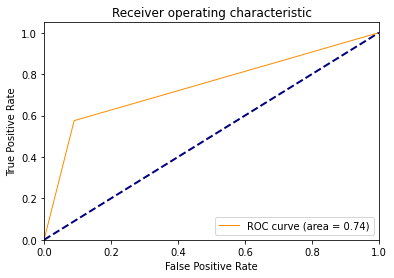

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
report_performance(gnb)
roc_curves(gnb)

### graphical representation of the supervised machine learning algorithms 

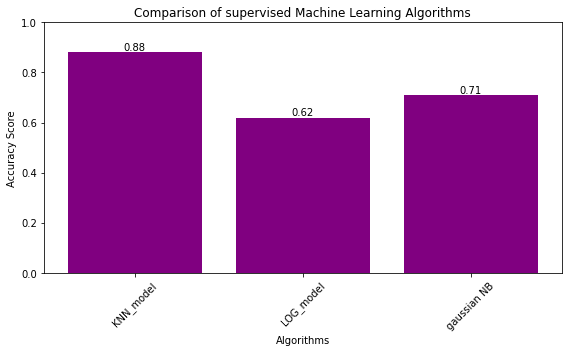

In [41]:
# Sample data for algorithm performance comparison
algorithms = ['KNN_model', 'LOG_model','gaussian NB']
accuracy_scores = [0.88,0.62,0.71]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='purple')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of supervised Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


## ensemble models 
1. gradient boosting 
2. stacking classifier 
3. Bagging classifier  

#### gradient boosting 

In [42]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred=gbc_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy in graidentboosting classifier',accuracy)


Accuracy in graidentboosting classifier 0.8365995031741651




Confusion Matrix:
[[1834  413]
 [ 179 1197]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2247
           1       0.74      0.87      0.80      1376

    accuracy                           0.84      3623
   macro avg       0.83      0.84      0.83      3623
weighted avg       0.85      0.84      0.84      3623



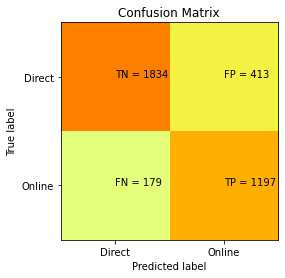

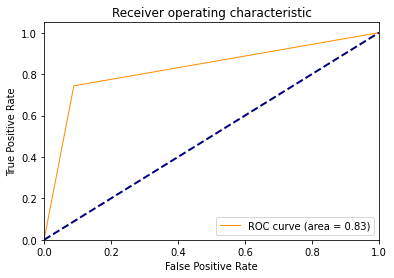

In [43]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
report_performance(gbc)
roc_curves(gbc)

#### Stacking classifier 
base models include 
1. DecisionTreeClassifier
2. RandomForestClassifier 
3. LogisticRegressionClassifier

note: base models are the combination of supervised machine learning models that forms stacking classifier 

In [44]:
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('logistic_regression', LogisticRegression())
]


In [45]:
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression()
)


In [46]:
from sklearn.metrics import accuracy_score
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in stacking classifier ", accuracy)



Accuracy in stacking classifier  0.942036985923268




Confusion Matrix:
[[2136  111]
 [  97 1279]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2247
           1       0.92      0.93      0.92      1376

    accuracy                           0.94      3623
   macro avg       0.94      0.94      0.94      3623
weighted avg       0.94      0.94      0.94      3623



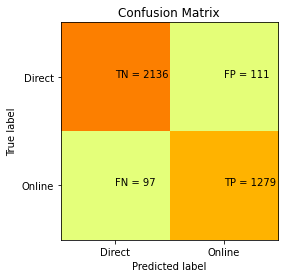

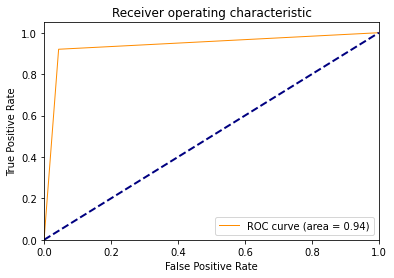

In [47]:
sc=StackingClassifier(
 estimators=base_classifiers,
    final_estimator=LogisticRegression()
)
sc.fit(X_train,y_train)
report_performance(sc)
roc_curves(sc)

#### Bagging classifier 
base model 
1. decision tree classifier 

In [48]:
# Create a BaggingClassifier
base_classifier = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_classifier, n_estimators=10, random_state=1)

# Fit the classifier on the training data
bc.fit(X_train, y_train)
# Make predictions
y_pred = bc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in Bagging classifier :", accuracy)

Accuracy in Bagging classifier : 0.9409329285122826




Confusion Matrix:
[[2132  115]
 [ 107 1269]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2247
           1       0.92      0.92      0.92      1376

    accuracy                           0.94      3623
   macro avg       0.93      0.94      0.94      3623
weighted avg       0.94      0.94      0.94      3623



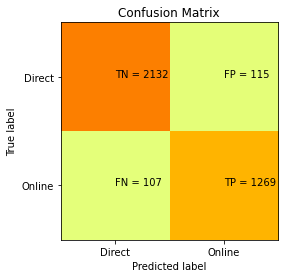

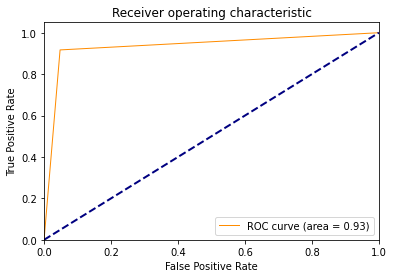

In [49]:
# ... (previous code for dataset, classifier, predictions, etc.)

bc=BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bc.fit(X_train,y_train)
report_performance(bc)
roc_curves(bc)


#### graphical representation of the ensemble algorithm

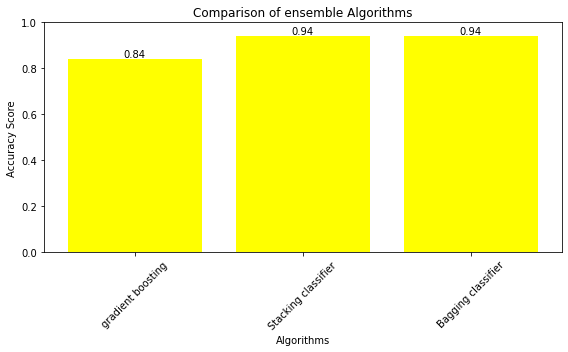

In [50]:
# Sample data for algorithm performance comparison
algorithms = ['gradient boosting', 'Stacking classifier','Bagging classifier']
accuracy_scores = [0.84,0.94,0.94]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='yellow')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of ensemble Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


### comparsion of both the supervised machine learning algorithm and ensemble algorithms 

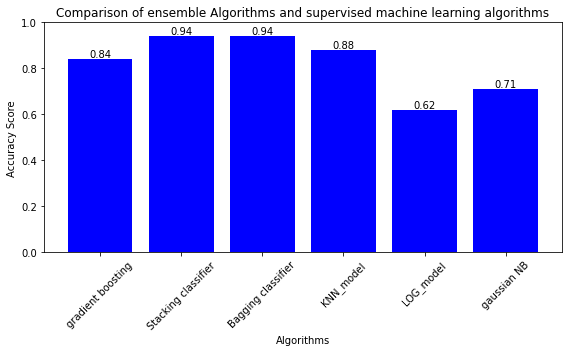

In [51]:
# Sample data for algorithm performance comparison
algorithms = ['gradient boosting', 'Stacking classifier','Bagging classifier','KNN_model', 'LOG_model','gaussian NB']
accuracy_scores = [0.84,0.94,0.94,0.88,0.62,0.71]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of ensemble Algorithms and supervised machine learning algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()
